<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/tps_april_sklearn_pycaret_laml_for_newbies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [Overview](#overview)
    - [Etiquette](#etiquette)
    
- [Feature Engineering](#feature_engineering)
    - [(1) Data Import](#data_import)
    - [(2) Data Combine](#data_combine)
    - [(3) Handling Missing Values](#handling_missing_values)
    - [(4) Feature Encoding](#feature_encoding)
    - [(5) Split Data](#split_data)
    - [(6) Limitation](#limitation)
    
- [Scikit Learn](#scikit_learn)
    - [(1) Data Split](#data_split)
    - [(2) Base Model - Decision Tree](#base_model_tree)
    - [(3) Create Helper Class and Submission Function](#helper_class)
        * [(A) DecisionTreeClassifier](#DecisionTreeClassifier)
        * [(B) RandomForestClassifier](#RandomForestClassifier)
        * [(C) LightGBM](#lightgbm)
        * [(D) Feature Importance](#feature_importance)
        * [(E) Submission](#submission) 

- [PyCaret](#pycaret)
    - [(1) Intro](#intro)
    - [(2) PyCaret Tutorials](#pycaret_tutorials)
    - [(3) Base Model](#base_model)
        + [(A) Initialize Setup](#initialize_setup)
        + [(B) Comparing All Models](#compare_models)
        + [(C) Create Model](#create_pycaret_model)
        + [(D) Tune Model](#tune_pycaret_model)
        + [(E) Plot Model](#plot_pycaret_model)
        + [(F) Predictions and Submissions](#preds_submissions)

> If you want to know how to create table of contents in Kaggle Notebooks, please check this article [Create Table of Contents in a Notebook](https://www.kaggle.com/dcstang/create-table-of-contents-in-a-notebook) by David Tang

<a id="overview"></a>
## Overview
- This is my personal tutorial sharing with my students as example. 
- The whole processes will be shared from EDA to Modeling and Evaluation, Finally Submission. 
    + Let's Check My [EDA Code](https://www.kaggle.com/j2hoon85/2021-april-play-ground-eda-for-kaggle-newbies)
- The well-known notebooks shared will be enough for students to learn Kaggle as an entry level. 

> Happy to Code

<a id='etiquette'></a>
### Etiquette
- When students get codes and ideas from other notebooks, then please make sure to leave a reference and upvote it as well. 👆👆👆

<a id="feature_engineering"></a>
## Feature Engineering
- After EDA, it's time to conduct Feature Engineering. 
- If you are not familiar with this concept, then please read a book

![Feature Engineering for Machine Learning](https://learning.oreilly.com/library/cover/9781491953235/250w/)
    
- And If you need a short summary about feature engineering, then please check this article as well. 
    + [@Chris Deotte Feature Engineering Techniques](https://www.kaggle.com/c/ieee-fraud-detection/discussion/108575)

<a id='data_import'></a>
### (1) Data Import
- Let's get datasets

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import os

print("Version Pandas", pd.__version__)
print("Version Matplotlib", matplotlib.__version__)
print("Version Numpy", np.__version__)
print("Version Seaborn", sb.__version__)

os.listdir('/content/drive/MyDrive/Colab Notebooks/kaggle2portpolio/data')

Version Pandas 1.1.5
Version Matplotlib 3.2.2
Version Numpy 1.19.5
Version Seaborn 0.11.1


['gender_submission.csv',
 'train.csv',
 'test.csv',
 'german_credit_data.csv',
 'Lemonade2016.csv']

In [4]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/kaggle2portpolio/data/'
train = pd.read_csv(BASE_DIR + 'train.csv')
test = pd.read_csv(BASE_DIR + 'test.csv')
gender_submission = pd.read_csv(BASE_DIR + 'gender_submission.csv')

train.shape, test.shape, gender_submission.shape

((891, 12), (418, 11), (418, 2))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id='data_combine'></a>
### (2) Data Combine
- Let's combine train with test as all_df

In [9]:
all_df = pd.concat([train, test])
all_df.shape

(1309, 12)

<a id='handling_missing_values'></a>
### (3) Handling Missing Values
- Let's fill with some value in each column.
> *Important Note:* This idea is from [TPS Apr 2021 LightGBM CV](https://www.kaggle.com/jmargni/tps-apr-2021-lightgbm-cv). Thank you. 


In [10]:
# Start
print("Before Handling:", all_df.shape)

# Age
age_dict = all_df[['Age', 'Pclass']].dropna().groupby('Pclass').mean().round(0).to_dict()
print("Avg. Mean of Age by Pclass:", age_dict)
all_df['Age'] = all_df['Age'].fillna(all_df.Pclass.map(age_dict['Age']))

# Cabin
all_df["Cabin"].fillna("No Cabin", inplace = True)
print("Values from Cabin: ", all_df["Cabin"].unique())
all_df['Cabin_Code'] = all_df['Cabin'].fillna('X').map(lambda x: x[0].strip())
print("Values from Cabin Code: ", all_df["Cabin_Code"].unique())

# Fare
print("Avg. Mean:", np.round(all_df['Fare'].mean(), 2))
all_df['Fare'] = all_df['Fare'].fillna(round(all_df['Fare'].mean(), 2))

# Embarked
all_df["Embarked"].fillna("X", inplace = True)
print("Values from Embarked: ", all_df["Embarked"].unique())

# Delete Columns
all_df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)
print("After Handling:", all_df.shape)

Before Handling: (1309, 12)
Avg. Mean of Age by Pclass: {'Age': {1: 39.0, 2: 30.0, 3: 25.0}}
Values from Cabin:  ['No Cabin' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84'

<a id='feature_encoding'></a>
### (4) Feature Encoding
- Let's check each column's data type

In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   object 
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   object 
 8   Cabin_Code  1309 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


- Dataset will be divided into two groups - categorical variables and numerical variables


In [12]:
cat_cols = ['Pclass', 'Sex', 'Cabin_Code', 'Embarked']
num_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

onehot_df = pd.get_dummies(all_df[cat_cols])
print("onehot_df Shape:", onehot_df.shape)

num_df = all_df[num_cols]
print("num_df Shape:", num_df.shape)

all_cleansed_df = pd.concat([num_df, onehot_df], axis=1)
print("all_cleansed_df Shape:", all_df.shape)

onehot_df Shape: (1309, 16)
num_df Shape: (1309, 5)
all_cleansed_df Shape: (1309, 9)


> Important note: When conducting feature encoding, Newbies must understand difference between ordinal encoding, label encoding, and one-hot encoding. See. https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/


<a id='split_data'></a>
### (5) Split Data
- Based on Feature Engineering, the final task is to re-split all data into independent variables and dependent variables. 





In [13]:
X = all_cleansed_df[:train.shape[0]]
print("X Shape is:", X.shape)
y = X['Survived']
X.drop(['Survived'], axis=1, inplace=True)
test_data = all_cleansed_df[train.shape[0]:].drop(columns=['Survived'])
test_data.info()

X Shape is: (891, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   SibSp         418 non-null    int64  
 2   Parch         418 non-null    int64  
 3   Fare          418 non-null    float64
 4   Pclass        418 non-null    int64  
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Cabin_Code_A  418 non-null    uint8  
 8   Cabin_Code_B  418 non-null    uint8  
 9   Cabin_Code_C  418 non-null    uint8  
 10  Cabin_Code_D  418 non-null    uint8  
 11  Cabin_Code_E  418 non-null    uint8  
 12  Cabin_Code_F  418 non-null    uint8  
 13  Cabin_Code_G  418 non-null    uint8  
 14  Cabin_Code_N  418 non-null    uint8  
 15  Cabin_Code_T  418 non-null    uint8  
 16  Embarked_C    418 non-null    uint8  
 17  Embarked_Q    418 non-null    uint8  
 18  Embarked

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
X.shape, y.shape

((891, 20), (891,))

In [15]:
test_data

,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Cabin_Code_A,Cabin_Code_B,Cabin_Code_C,Cabin_Code_D,Cabin_Code_E,Cabin_Code_F,Cabin_Code_G,Cabin_Code_N,Cabin_Code_T,Embarked_C,Embarked_Q,Embarked_S,Embarked_X
0,34.5,0,0,7.8292,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,47.0,1,0,7.0000,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,62.0,0,0,9.6875,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,27.0,0,0,8.6625,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,22.0,1,1,12.2875,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
414,39.0,0,0,108.9000,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
415,38.5,0,0,7.2500,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
416,25.0,0,0,8.0500,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


<a id="limitation"></a>
### (6) Limitation
- What I missed here is not to create new variable so-called wealthy class and others, yet. My assumption is wealthy people were more survived than other group. This will be compared baseline model with the more upgraded model, reflecting new feature. If some readers get this idea, then please implement it. Hope to see a better model. 

<a id="scikit_learn"></a>
## Scikit Learn
- Let's make simple model based on Scikit Learn Framework.
- URL: https://scikit-learn.org/stable/

![](https://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png)

<a id="data_split"></a>
### (1) Data Split
- We know test data exists as final testset, so we create validation set from sklearn module. 
- We will use [Stratified Sampling](https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36). 

In [16]:
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8MB 8.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [17]:
import sklearn
print(sklearn.__version__)

0.23.2


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify = X[['Pclass']], random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((623, 20), (268, 20), (623,), (268,))

<a id="base_model_tree"></a>
### (2) Base Model - Decision Tree
- Let's create Base Model
- Model Evaluation is [Accuracy](https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation)
    + If you want to know more, please see https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

In [19]:
from sklearn.metrics import accuracy_score
def acc_score(y_true, y_pred, **kwargs):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int), **kwargs)

- Let's evaluate of base model using validation set
- AUC & Accurarcy are measured at this moment. 

Model AUC: 0.8694668623135241
Model Accurarcy: 0.8134328358208955




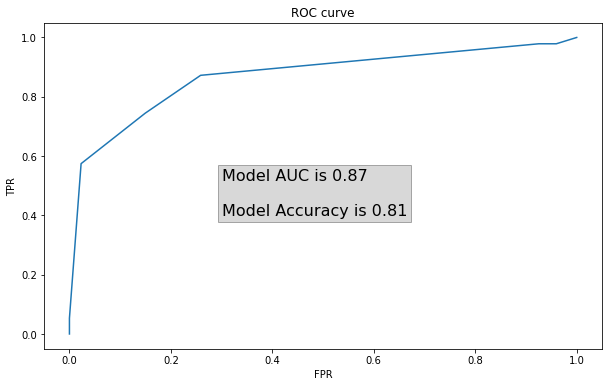

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
predictions = tree_model.predict_proba(X_val)
AUC = roc_auc_score(y_val, predictions[:,1])
ACC = acc_score(y_val, predictions[:,1])
print("Model AUC:", AUC)
print("Model Accurarcy:", ACC)
print("\n")

fpr, tpr, _ = roc_curve(y_val, predictions[:,1])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fpr, tpr)
ax.text(x = 0.3, 
        y = 0.4, 
        s = "Model AUC is {}\n\nModel Accuracy is {}".format(np.round(AUC, 2), np.round(ACC, 2)), 
        fontsize=16, bbox=dict(facecolor='gray', alpha=0.3))
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve')

plt.show()

- Good, great. 
- Now, we finally submit file to competition. 
- `.5` Threshold could be different, depending upon your assumption. 
    + If you are not familar with the concept Threshold, then please read this article. https://developers.google.com/machine-learning/crash-course/classification/thresholding

In [24]:
final_preds = tree_model.predict(test_data)
binarizer = np.vectorize(lambda x: 1 if x >= .5 else 0)
prediction_binarized = binarizer(final_preds)
submission = pd.concat([gender_submission,pd.DataFrame(prediction_binarized)], axis=1).drop(columns=['Survived'])
submission.columns = ['PassengerId', 'Survived']
submission.to_csv('tree_base_submission.csv', index=False)

<a id="helper_class"></a>
### (3) Create Helper Class and Submission Function
- we need to create helper class with common tasks such as model, train, predict, fit, feature_importance, and even ROC Curve Graph
- 


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

SEED = 0 # for Reproducibility

# class 
class sk_helper(object):
    def __init__(self, model, seed = 0, params={}):
        params['random_state'] = seed
        self.model = model(**params)
        self.model_name = str(model).split(".")[-1][:-2]
        
    # train
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    # predict
    def predict(self, y_val):
        return self.model.predict(y_val)
    
    # inner fit
    def fit(self, x, y):
        return self.model.fit(x, y)
    
    # feature importance
    def feature_importances(self, X_train, y_train):
        return self.model.fit(X_train, y_train).feature_importances_
        
    # roc_curve
    def roc_curve_graph(self, X_train, y_train, X_val, y_val):
        self.model.fit(X_train, y_train)
        
        print("model_name:", self.model_name)
        model_name = self.model_name
        preds_proba = self.model.predict_proba(X_val)
        preds = (preds_proba[:, 1] > 0.5).astype(int)
        auc = roc_auc_score(y_val, preds_proba[:, 1])
        acc = accuracy_score(y_val, preds)
        confusion = confusion_matrix(y_val, preds)
        print('Confusion Matrix')
        print(confusion)
        print("Model AUC: {0:.3f}, Model Accuracy: {1:.3f}\n".format(auc, acc))
        fpr, tpr, _ = roc_curve(y_val, predictions[:,1])
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.plot(fpr, tpr)
        ax.text(x = 0.3, 
                y = 0.4, 
                s = "Model AUC is {}\n\nModel Accuracy is {}".format(np.round(auc, 2), np.round(acc, 2)), 
                fontsize=16, bbox=dict(facecolor='gray', alpha=0.3))
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.set_title('ROC curve of {}'.format(model_name), fontsize=16)

        plt.show()

- Now, Let's test if this works or not

<a id="DecisionTreeClassifier"></a>
#### (A) DecisionTreeClassifier
- This is DecisionTreeClassifier Model from [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

model_name: DecisionTreeClassifier
Confusion Matrix
[[146  28]
 [ 30  64]]
Model AUC: 0.790, Model Accuracy: 0.784



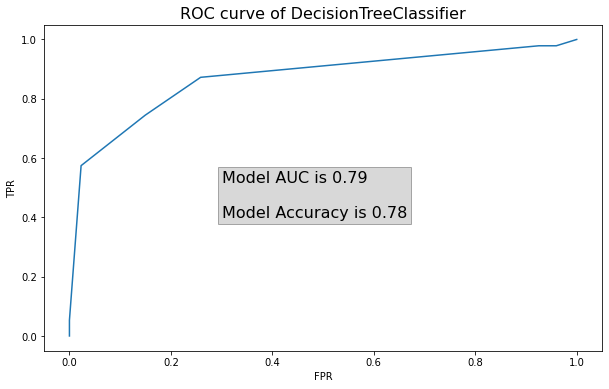

CPU times: user 174 ms, sys: 4.51 ms, total: 178 ms
Wall time: 179 ms


In [26]:
%%time
tree_params = {'max_depth': 6}

tree_model = sk_helper(model=DecisionTreeClassifier, seed=SEED, params=tree_params)
tree_model.roc_curve_graph(X_train, y_train, X_val, y_val)

<a id="RandomForestClassifier"></a>
#### (B) RandomForestClassifier
- This is RandomForestClassifier Model from [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


model_name: RandomForestClassifier


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


Confusion Matrix
[[146  28]
 [ 25  69]]
Model AUC: 0.870, Model Accuracy: 0.802



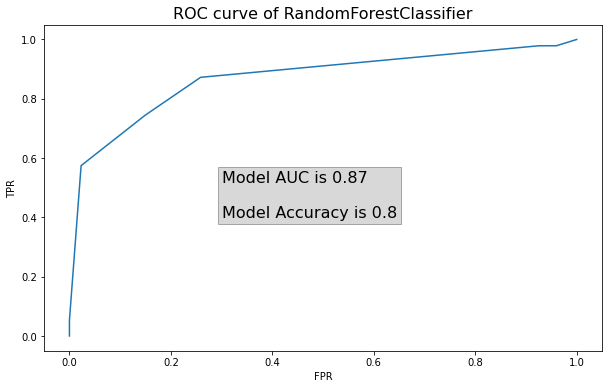

CPU times: user 1.43 s, sys: 216 ms, total: 1.64 s
Wall time: 1.53 s


In [27]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

rf_model = sk_helper(model=RandomForestClassifier, seed=SEED, params=rf_params)
rf_model.roc_curve_graph(X_train, y_train, X_val, y_val)

<a id="lightgbm"></a>
#### (C) LightGBM
- Let's implement LightGBM with best parameters. You can found it here: https://www.kaggle.com/jmargni/tps-apr-2021-lightgbm-optuna

2.2.3
model_name: LGBMClassifier
Confusion Matrix
[[136  38]
 [ 26  68]]
Model AUC: 0.808, Model Accuracy: 0.761



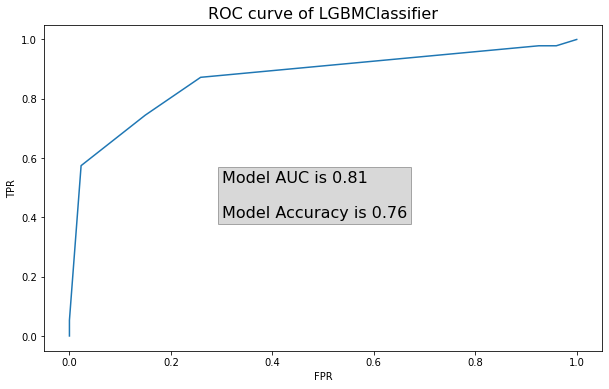

CPU times: user 6.47 s, sys: 557 ms, total: 7.02 s
Wall time: 3.82 s


In [28]:
%%time

import lightgbm
from lightgbm import LGBMClassifier
print(lightgbm.__version__)
lgb_params = {
    'metric': 'auc',
    'n_estimators': 10000,
    'objective': 'binary',
}

lgb_model = sk_helper(model=LGBMClassifier, seed=SEED, params=lgb_params)
lgb_model.roc_curve_graph(X_train, y_train, X_val, y_val)

<a id="feature_importance"></a>
#### (D) Feature Importance 
- Let's draw graph feature importance plot

In [29]:
tree_features = tree_model.feature_importances(X_train, y_train)
rf_features = rf_model.feature_importances(X_train, y_train)
lgb_features = lgb_model.feature_importances(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [30]:
cols = X.columns.values
feature_df = pd.DataFrame({'features': cols, 
                          'Decision Tree': tree_features, 
                          'RandomForest': rf_features, 
                          'LightGBM': lgb_features})

feature_df

,features,Decision Tree,RandomForest,LightGBM
0,Age,0.131732,0.098029,53954
1,SibSp,0.056648,0.041422,3981
2,Parch,0.012762,0.034683,6486
3,Fare,0.126136,0.112136,66988
4,Pclass,0.098942,0.079791,4768
5,Sex_female,0.510503,0.238834,3745
6,Sex_male,0.000000,0.253036,3633
7,Cabin_Code_A,0.000000,0.003109,0
8,Cabin_Code_B,0.000000,0.005421,422
9,Cabin_Code_C,0.000000,0.005402,470


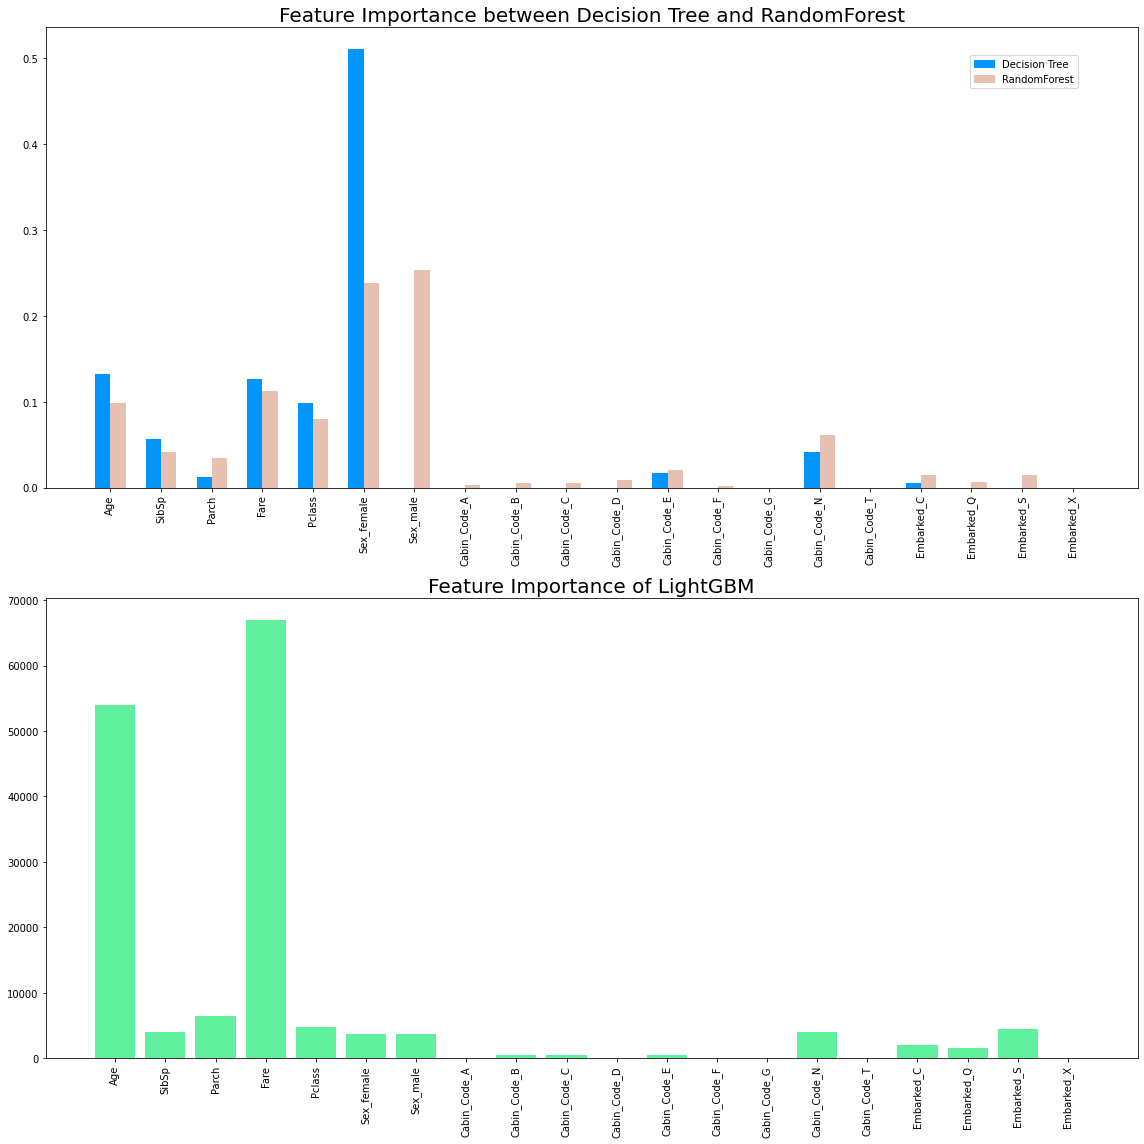

In [31]:
%matplotlib inline

import seaborn as sb
import matplotlib.pyplot as plt

width = 0.3
x = np.arange(0, len(feature_df.index))

## ax[0] graph
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 16)) # Option sharex=True
ax[0].bar(x - width/2, feature_df['Decision Tree'], color = "#0095FF", width = width)
ax[0].bar(x + width/2, feature_df['RandomForest'], color = "#E6C0B1", width = width)
ax[0].set_xticks(x)
ax[0].set_xticklabels(feature_df['features'], rotation=90)

## ax[0] legend
colors = {'Decision Tree':'#0095FF', 'RandomForest':'#E6C0B1'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

ax[0].legend(handles, labels, bbox_to_anchor = (0.95, 0.95))
ax[0].set_title("Feature Importance between Decision Tree and RandomForest", fontsize=20)

## ax[1] graph
ax[1].bar(x, feature_df['LightGBM'], color = "#60F09E")
ax[1].set_xticks(x)
ax[1].set_xticklabels(feature_df['features'], rotation=90)
ax[1].set_title("Feature Importance of LightGBM", fontsize=20)

## plt manage
## plt.xticks(x, feature_df['features'], rotation=90)
plt.tight_layout()
plt.show()

- Each algorithm provides different feature important values. 
    + If you want to know this concept further, please read this article: [How to Calculate Feature Importance With Python](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
- The main goal here is to improve a predictive model, deleting some features. For example, feature SisSp and Parch in both algorithm are not quite important. So, At this moment, we can delete them.
    + This code will be worked with feature engineering section. 


### 

<a id="submission"></a>
#### (E) Submission
- Now, we create submission function. 

In [33]:
import numpy as np
from datetime import datetime

version = datetime.now().strftime("%d-%m-%Y %H-%M-%S")

def final_submission(model, data, version):
    final_preds = model.predict(data)
    binarizer = np.vectorize(lambda x: 1 if x >= .5 else 0)
    prediction_binarized = binarizer(final_preds)
    submission = pd.concat([gender_submission,pd.DataFrame(prediction_binarized)], axis=1).drop(columns=['Survived'])
    submission.columns = ['PassengerId', 'Survived']
    submission.to_csv('Sklearn of Submit Date {} Submission.csv'.format(version), index=False)
    
final_submission(lgb_model, test_data, version)

- Now, We will move on `PyCaret` Framework. 

<a id='pycaret'></a>
## PyCaret
![](https://miro.medium.com/max/2048/1*Cku5-rqmqSIuhUyFkIAdIA.png)

- PyCaret.. Caret in R?
    + My 1st reaction on this.. when got heard .. was "is it copy of [caret](https://cran.r-project.org/web/packages/caret/vignettes/caret.html) package in R?"
    
- Let's look at this framework. 


<a id="intro"></a>
### (1) Intro
- URL: https://pycaret.org/about/
> It's an open source low-code machine learning library that aims to reduce cycle time from hypothesis to insights. 

- Point 1. Simple and Easy to use
> All the operations performed in PyCaret are automatically stored in a custom `Pipeline` that is fully orchestrated for `deployment`. 
- Point 2. Python Wrapper
> Around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more. 
- Point 3. Train Multiple Models 
> It trains multiple models SIMULTANEOUSLY.. (interesting!) and outputs a table comparing performaces of each model you developed. 
- Point 4. [PyCaret on GPU](https://pycaret.readthedocs.io/en/latest/installation.html)
> `PyCaret >= 2.2` provides the option to use GPU for select model training and hyperparameter tuning. There is no change in the use of the API, however, in some cases, additional libraries have to be installed as they are not installed with the default slim version or the full version. The following estimators can be trained on GPU.

<a id="pycaret_tutorials"></a>
### (2) PyCaret Tutorials 
- If you want to learn some basic tutorials, then please visit here: https://pycaret.readthedocs.io/en/latest/tutorials.html
     + I will skip out introducing some basic codes here. 

<a id="base_model"></a>
### (3) Base Model
- Unfortunately, if you want to use this framework, then you should install it with following command. 
> !pip install pycaret

- It will take a few minutes.

- We will downgrade it this since we are going to use PyCaret. Some issues are reported.
    + https://github.com/pycaret/pycaret/issues/1140

In [34]:
# !pip uninstall scikit-learn -y
!pip install pycaret==2.2.3

     |████████████████████████████████| 256kB 7.6MB/s 
     |████████████████████████████████| 245kB 13.2MB/s 
     |████████████████████████████████| 1.7MB 14.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 215kB 37.9MB/s 
     |████████████████████████████████| 2.0MB 38.3MB/s 
     |████████████████████████████████| 67.3MB 62kB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 14.2MB 42.3MB/s 
     |████████████████████████████████| 166.7MB 81kB/s 
     |████████████████████████████████| 276kB 22.2MB/s 
     |████████████████████████████████| 1.1MB 32.2MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 3.2MB 23.4MB/s 
     |████████████████████████████████| 61kB 6.5MB/s

- Let's check version

In [35]:
# check version
from pycaret.utils import version
import sklearn
print("pycaret version:", version())
print("sklearn version:", sklearn.__version__)

pycaret version: 2.2.3
sklearn version: 0.23.2


<a id="initialize_setup"></a>
#### (A) Initialize Setup
- Before you train, you need to setup with following code. 
- Here, We need to combine two dataframe, X and y and stored it as train_data


In [36]:
all_df_pycaret = pd.concat([X, y], axis=1)
all_df_pycaret['Survived'] = all_df_pycaret['Survived'].astype('int64')
all_df_pycaret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           891 non-null    float64
 1   SibSp         891 non-null    int64  
 2   Parch         891 non-null    int64  
 3   Fare          891 non-null    float64
 4   Pclass        891 non-null    int64  
 5   Sex_female    891 non-null    uint8  
 6   Sex_male      891 non-null    uint8  
 7   Cabin_Code_A  891 non-null    uint8  
 8   Cabin_Code_B  891 non-null    uint8  
 9   Cabin_Code_C  891 non-null    uint8  
 10  Cabin_Code_D  891 non-null    uint8  
 11  Cabin_Code_E  891 non-null    uint8  
 12  Cabin_Code_F  891 non-null    uint8  
 13  Cabin_Code_G  891 non-null    uint8  
 14  Cabin_Code_N  891 non-null    uint8  
 15  Cabin_Code_T  891 non-null    uint8  
 16  Embarked_C    891 non-null    uint8  
 17  Embarked_Q    891 non-null    uint8  
 18  Embarked_S    891 non-null    

- This code is simple but very powerful. 
- If you want to study more setting up more options such as Data Preparation, Scale and Transformation, and Feature Engineering, Feature Selection. Then please visit here: https://pycaret.org/train-test-split/


In [37]:
from pycaret.classification import *

setup(data = all_df_pycaret, 
      target = 'Survived', 
      fold = 3,
      silent = True
     )

,Description,Value
0,session_id,3218
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 21)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


({'Bagging': <pycaret.containers.models.classification.BaggingClassifierContainer at 0x7ffa2e5572d0>,
  'CalibratedCV': <pycaret.containers.models.classification.CalibratedClassifierCVContainer at 0x7ffa2e557590>,
  'Stacking': <pycaret.containers.models.classification.StackingClassifierContainer at 0x7ffa2e5573d0>,
  'Voting': <pycaret.containers.models.classification.VotingClassifierContainer at 0x7ffa2e557510>,
  'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7ffa2e597150>,
  'catboost': <pycaret.containers.models.classification.CatBoostClassifierContainer at 0x7ffa2e5bedd0>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7ffa2e5974d0>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7ffa2e5be610>,
  'gbc': <pycaret.containers.models.classification.GradientBoostingClassifierContainer at 0x7ffa2e5be250>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClas

<a id="compare_models"></a>
#### (B) Comparing All Models
- This is starting point to recommend a model, evaluating performaces of all models when the setup is completed. 
- This function trains all models in the model library and scores them using stratified cross validation for metric evaluation.

In [38]:
%%time

best_model = compare_models(sort = 'Accuracy', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8010,0.8489,0.6676,0.7913,0.7202,0.5679,0.5763,1.1667
lr,Logistic Regression,0.7978,0.8317,0.6928,0.7638,0.7255,0.5661,0.5687,1.2767
ridge,Ridge Classifier,0.7930,0.0000,0.6887,0.7554,0.7197,0.5562,0.5584,0.0300
lda,Linear Discriminant Analysis,0.7930,0.8294,0.6887,0.7554,0.7197,0.5562,0.5584,0.0367
gbc,Gradient Boosting Classifier,0.7929,0.8483,0.6470,0.7818,0.7064,0.5489,0.5560,0.1033
rf,Random Forest Classifier,0.7865,0.8463,0.6761,0.7503,0.7096,0.5417,0.5450,0.6067
ada,Ada Boost Classifier,0.7753,0.8105,0.6970,0.7148,0.7048,0.5236,0.5246,0.1200
xgboost,Extreme Gradient Boosting,0.7737,0.8431,0.6509,0.7420,0.6871,0.5119,0.5199,2.7200
et,Extra Trees Classifier,0.7496,0.8142,0.6470,0.6923,0.6662,0.4666,0.4696,0.6033
dt,Decision Tree Classifier,0.7384,0.7143,0.6262,0.6828,0.6491,0.4416,0.4463,0.0200


CPU times: user 6.33 s, sys: 858 ms, total: 7.19 s
Wall time: 26.9 s


In [39]:
print(best_model)

[<catboost.core.CatBoostClassifier object at 0x7ffa2e3e5310>, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3218, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3218,
                solver='auto', tol=0.001)]


- To me, the best model is `Gradient Boosting Classifier`
- So, We will create GBC model in this tutorial. 

<a id="create_pycaret_model"></a>
#### (C) Create Model
- This function creates a model and scores it using Stratified Cross Validation.The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold (default = 10 Fold). This function returns a trained model object. 
- You can create different models here. 
    + Examples: https://pycaret.org/classification/

```python
# train logistic regression model
lr = create_model('lr') #lr is the id of the model
# check the model library to see all models
models()
# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)
# train svm model without CV
svm = create_model('svm', cross_validation = False)
# train xgboost model with max_depth = 10
xgboost = create_model('xgboost', max_depth = 10)
# train xgboost model on gpu
xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id
# train multiple lightgbm models with n learning_rate<br>import numpy as np
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]
# train custom model
from gplearn.genetic import SymbolicClassifier
symclf = SymbolicClassifier(generation = 50)
sc = create_model(symclf)
```

In [40]:
%%time
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7596,0.8347,0.6125,0.7206,0.6622,0.4775,0.4813
1,0.8221,0.8514,0.7284,0.7973,0.7613,0.6200,0.6216
2,0.7971,0.8590,0.6000,0.8276,0.6957,0.5492,0.5652
Mean,0.7929,0.8483,0.6470,0.7818,0.7064,0.5489,0.5560
SD,0.0257,0.0102,0.0578,0.0450,0.0412,0.0582,0.0576


CPU times: user 435 ms, sys: 9.59 ms, total: 445 ms
Wall time: 760 ms


<a id="tune_pycaret_model"></a>
#### (D) Tune Model
- This function tunes the hyperparameters of a model and scores it using Stratified Cross Validation. The output prints a score grid that shows Accuracy, AUC, Recall Precision, F1, Kappa, and MCCby fold (by default = 10 Folds). This function returns a trained model object.
    + Examples: https://pycaret.org/classification/#tune-model
    
```python
# train a decision tree model with default parameters
dt = create_model('dt')

# tune hyperparameters of decision tree
tuned_dt = tune_model(dt)

# tune hyperparameters with increased n_iter
tuned_dt = tune_model(dt, n_iter = 50)

# tune hyperparameters to optimize AUC
tuned_dt = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'

# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

tuned_dt_custom = tune_model(dt, custom_grid = params)

# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
```

In [41]:
%%time
tuned_gbc = tune_model(gbc_model, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7981,0.8479,0.6625,0.7794,0.7162,0.5611,0.5656
1,0.8462,0.8688,0.8025,0.8025,0.8025,0.6765,0.6765
2,0.7874,0.8440,0.6250,0.7812,0.6944,0.5345,0.5424
Mean,0.8106,0.8536,0.6967,0.7877,0.7377,0.5907,0.5948
SD,0.0255,0.0109,0.0764,0.0105,0.0466,0.0616,0.0585


CPU times: user 1.31 s, sys: 47.5 ms, total: 1.35 s
Wall time: 18.4 s


<a id = "plot_pycaret_model"></a>
#### (E) Plot Model
- This function takes a trained model object and returns a plot based on the test / hold-out set. The process may require the model to be re-trained in certain cases. See list of plots supported below. Model must be created using create_model() or tune_model().
    + Examples: https://pycaret.org/classification/#plot-model

```python
#create a model
lr = create_model('lr')
#plot a model
plot_model(lr)
```

- Many options are avaiable. 

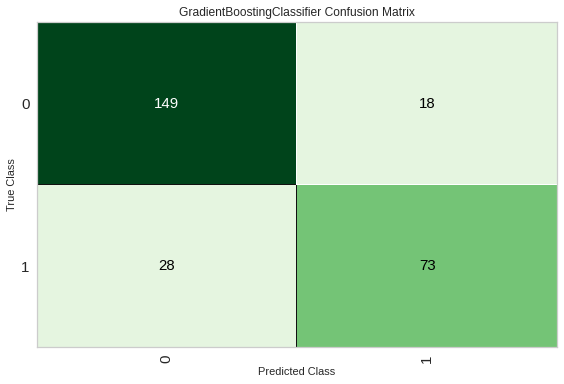

In [42]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

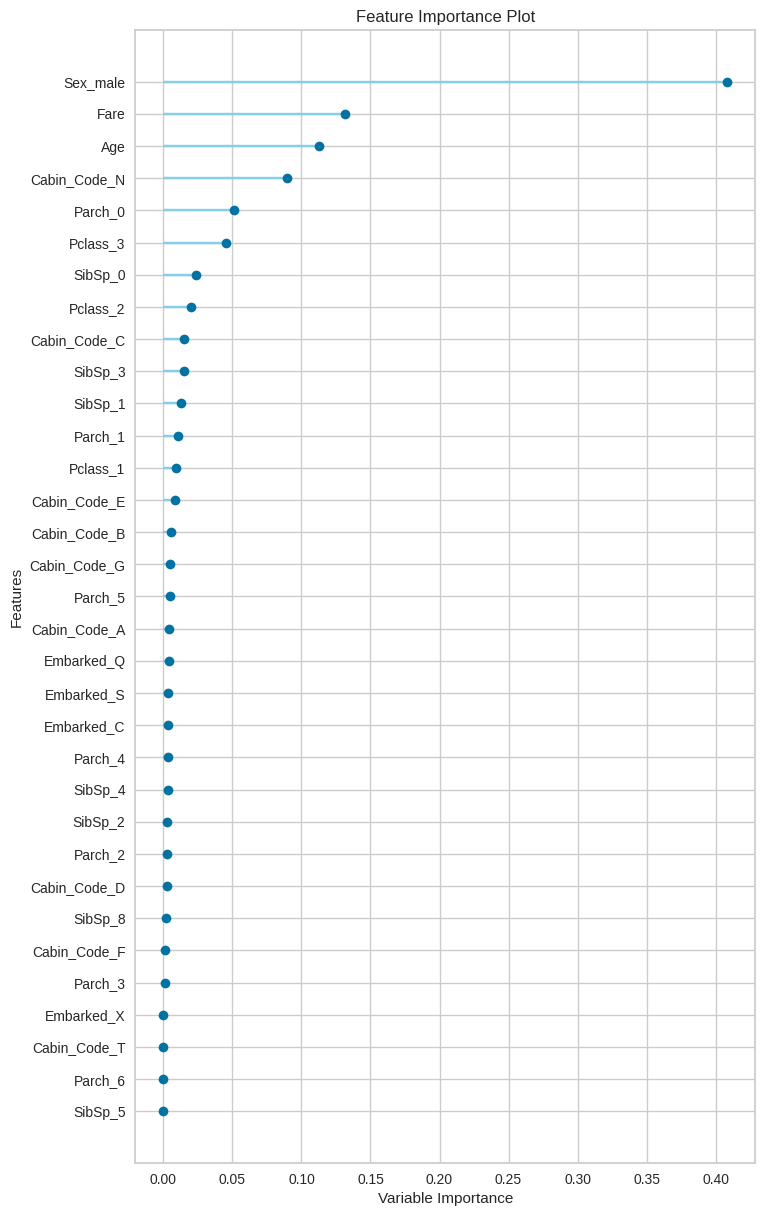

In [43]:
plot_model(tuned_gbc, plot = 'feature_all')

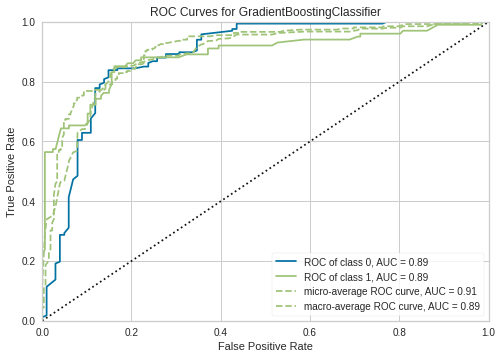

In [44]:
plot_model(tuned_gbc, plot = 'auc')

<a id="preds_submissions"></a>
#### (F) Predictions and Submissions
- Now, it's time to predict and submit it. 


In [45]:
predictions = predict_model(tuned_gbc, data = test_data)
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   SibSp         418 non-null    int64  
 2   Parch         418 non-null    int64  
 3   Fare          418 non-null    float64
 4   Pclass        418 non-null    int64  
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Cabin_Code_A  418 non-null    uint8  
 8   Cabin_Code_B  418 non-null    uint8  
 9   Cabin_Code_C  418 non-null    uint8  
 10  Cabin_Code_D  418 non-null    uint8  
 11  Cabin_Code_E  418 non-null    uint8  
 12  Cabin_Code_F  418 non-null    uint8  
 13  Cabin_Code_G  418 non-null    uint8  
 14  Cabin_Code_N  418 non-null    uint8  
 15  Cabin_Code_T  418 non-null    uint8  
 16  Embarked_C    418 non-null    uint8  
 17  Embarked_Q    418 non-null    uint8  
 18  Embarked_S    418 non-null    

In [46]:
submission = pd.read_csv(BASE_DIR + 'gender_submission.csv')
submission['Survived'] = predictions['Label']
submission.to_csv('PyCaret Submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


- Finally Done. I will review the framework later. 

#### 